**coonecting with google-drive**

In [4]:
from google.colab import drive   #to connect google drive with google colab
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**dispplaying the image from one of the class**

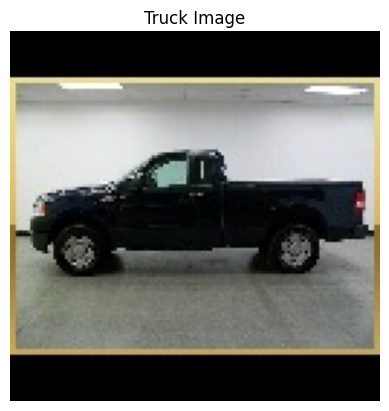

In [5]:
import os    # to show random picture from my dataset /train/Truck
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the "first" folder containing "train" and "valid" folders
first_folder_path = '/content/drive/My Drive/project/first'

# Define the path to the "train" folder within the "first" folder
train_folder_path = os.path.join(first_folder_path, 'train')

# Define the path to the "Truck" folder within the "train" folder
truck_folder_path = os.path.join(train_folder_path, 'Truck')

# List the image files in the "Truck" folder
truck_files = os.listdir(truck_folder_path)

# Pick one image file randomly from the "Truck" folder
image_file = random.choice(truck_files)

# Load the image using PIL
image_path = os.path.join(truck_folder_path, image_file)
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.title('Truck Image')  # Title of the image
plt.show()


**displaying the image from second class**

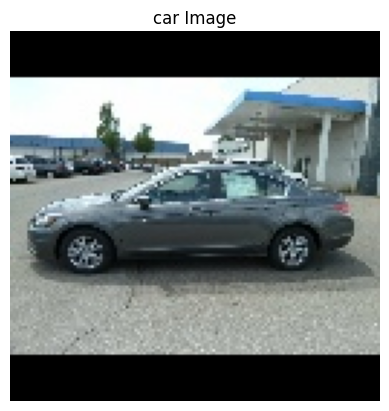

In [6]:
first_folder_path = '/content/drive/My Drive/project/first'         #to show picture of CAR from valid folder

# Define the path to the "valid" folder within the "first" folder
train_folder_path = os.path.join(first_folder_path, 'valid')

# Define the path to the "car" folder within the "valid" folder
car_folder_path = os.path.join(train_folder_path, 'Car')

# List the image files in the "car" folder
car_files = os.listdir(car_folder_path)

# Pick one image file randomly from the "car" folder
image_file = random.choice(car_files)

# Load the image using PIL
image_path = os.path.join(car_folder_path, image_file)
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.title('car Image')  # Title of the image
plt.show()

**forming the model i.e CNN**

In [7]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [8]:
def set_seed(seed=31415):              ############################
    np.random.seed(seed)                  # dont know its use just copied it
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [9]:
plt.rc('figure', autolayout=True)       # used rc function to customize the figure's layout for future use
plt.rc('axes', labelweight='bold', labelsize='large',          # just inserted the characteristics  while customizing the picturse
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells



In [10]:
ds_train_ = image_dataset_from_directory(                      #defining train varible for my model , giving it path
    '/content/drive/My Drive/project/first/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)


Found 5118 files belonging to 2 classes.


In [11]:
ds_valid_ = image_dataset_from_directory(
    '/content/drive/My Drive/project/first/valid',         #defining valid variable
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)


Found 5071 files belonging to 2 classes.


In [12]:
def convert_to_float(image, label):             #converting images into float(we can convert it in tensor as well) so the preprocessing will be easy
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)              #converting into float also allows to noramlaze the pictures
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE      #increaes the efficiency,perfomance
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [13]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

model = keras.Sequential([
    # Block One
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',      #same pedding allows to get loutput of same size as of input
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Block Two
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),                     #removing the portion of neurons
    layers.Dense(1, activation='sigmoid'),
])

**compilation of Model**

In [14]:
model.compile(                                #compiling the model
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [15]:
model.compile(                                    # if we need diffrent requiremnst then we can use 2 compilers,
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),            #in this context, i dont know why we are using 2 compilers
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

**Training of the Model**

In [22]:
history = model.fit(                         #training the model
    ds_train,
    validation_data=ds_valid,
    epochs=30,
)

Epoch 1/30
80/80 [==============================] - 4s 52ms/step - loss: 0.0310 - binary_accuracy: 0.9914 - val_loss: 1.4957 - val_binary_accuracy: 0.8271
Epoch 2/30
80/80 [==============================] - 3s 43ms/step - loss: 0.0419 - binary_accuracy: 0.9885 - val_loss: 1.1169 - val_binary_accuracy: 0.8416
Epoch 3/30
80/80 [==============================] - 3s 42ms/step - loss: 0.0352 - binary_accuracy: 0.9912 - val_loss: 1.1110 - val_binary_accuracy: 0.8418
Epoch 4/30
80/80 [==============================] - 3s 43ms/step - loss: 0.0321 - binary_accuracy: 0.9912 - val_loss: 1.1493 - val_binary_accuracy: 0.8351
Epoch 5/30
80/80 [==============================] - 3s 43ms/step - loss: 0.0290 - binary_accuracy: 0.9920 - val_loss: 1.1457 - val_binary_accuracy: 0.8416
Epoch 6/30
80/80 [==============================] - 3s 43ms/step - loss: 0.0253 - binary_accuracy: 0.9945 - val_loss: 1.0190 - val_binary_accuracy: 0.8424
Epoch 7/30
80/80 [==============================] - 4s 54ms/step - los

**Pictorial Representation of loss and accuracy and its Trend**

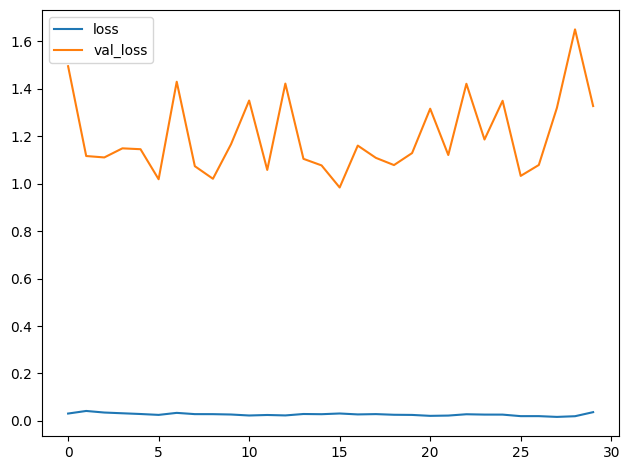

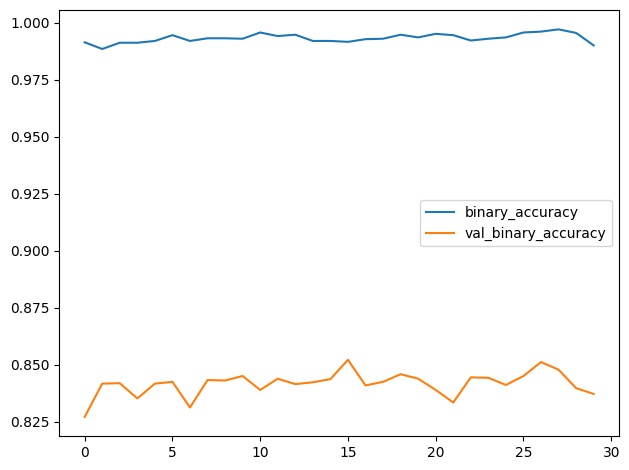

In [23]:
import pandas as pd
history_frame = pd.DataFrame(history.history)      #to store the history perfomance of model while training it
history_frame.loc[:, ['loss', 'val_loss']].plot()  #representing how loss is changing over time, loss for training, val_loss for valid data
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();        #binary accuracy


**Evaluation of Model, efficiency score**

In [24]:
# Assuming you have a model named 'model' and a validation dataset named 'validation_dataset'

# Evaluate the model on the validation dataset
evaluation_result = model.evaluate(ds_valid)

# Extract the efficiency score (binary accuracy in this case)
efficiency_score = evaluation_result[1]  # index 1 corresponds to binary accuracy

print("Efficiency Score on Validation Data:", efficiency_score)


80/80 [==============================] - 1s 10ms/step - loss: 1.3276 - binary_accuracy: 0.8371
Efficiency Score on Validation Data: 0.8371130228042603


**Saving the model**

In [40]:

# Assuming your model object is named 'model'
model.save("/content/drive/My Drive/project/first/my_classification_model.h5")


import os

# Check if the file exists
model_path = "/content/my_classification_model.h5"
if os.path.exists(model_path):
    print("Model file exists.")
else:
    print("Model file does not exist. Please ensure the model was saved correctly.")

# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

# Example usage of the loaded model
loaded_model.summary()  # Print model summary


Model file exists.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None,

In [39]:
import os

# Check the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

# List the contents of the current directory
print("Contents of the current directory:")
print(os.listdir(current_directory))


Current working directory: /content
Contents of the current directory:
['.config', 'drive', 'my_classification_model.h5', 'sample_data']


**confusion Matrix**

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Make predictions on the validation data
predictions = (model.predict(ds_valid_) > 0.5).astype("int32")

# Get the true labels from the validation dataset
true_labels = np.concatenate([y for x, y in ds_valid_], axis=0)

# Get the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)


80/80 [==============================] - 14s 155ms/step
Confusion Matrix:
[[1859 1073]
 [1375  764]]


**Classification Report**

In [30]:
from sklearn.metrics import classification_report

# Make predictions on the validation data
predictions = (model.predict(ds_valid_) > 0.5).astype("int32")

# Get the true labels from the validation dataset
true_labels = np.concatenate([y for x, y in ds_valid_], axis=0)

# Generate the classification report
report = classification_report(true_labels, predictions)

print("Classification Report:")
print(report)


80/80 [==============================] - 21s 226ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.65      0.61      2932
         1.0       0.44      0.37      0.40      2139

    accuracy                           0.53      5071
   macro avg       0.51      0.51      0.51      5071
weighted avg       0.52      0.53      0.53      5071



**train and validation accuracy graph**

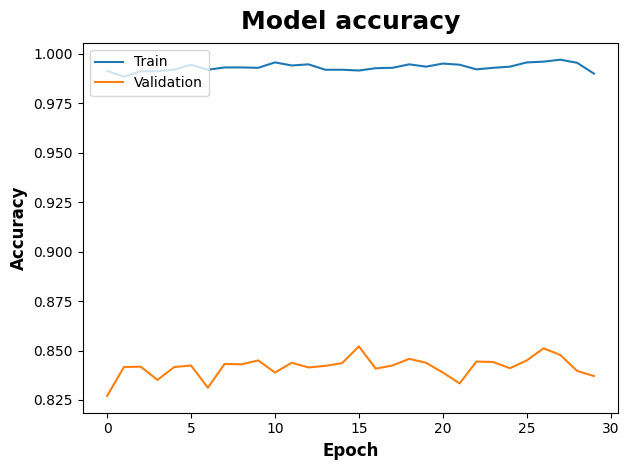

In [33]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and stored the history
# history = model.fit(train_dataset, validation_data=validation_dataset, epochs=30)

# Plot training & validation accuracy values
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**train and  validation Loss plot**

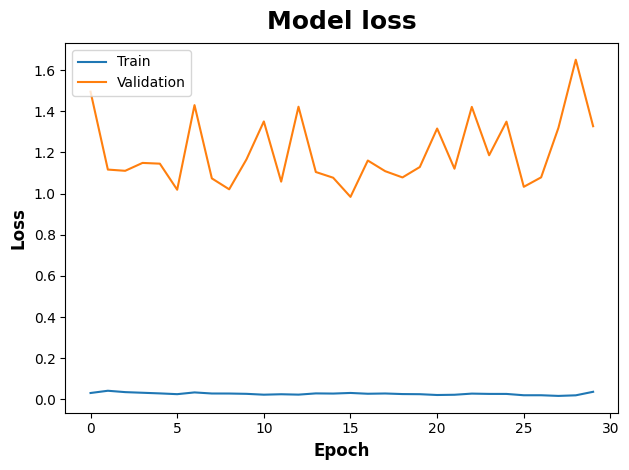

In [34]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
